In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from pathlib import Path

# %matplotlib widget

## Helper functions

In [2]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

## Plot generation method

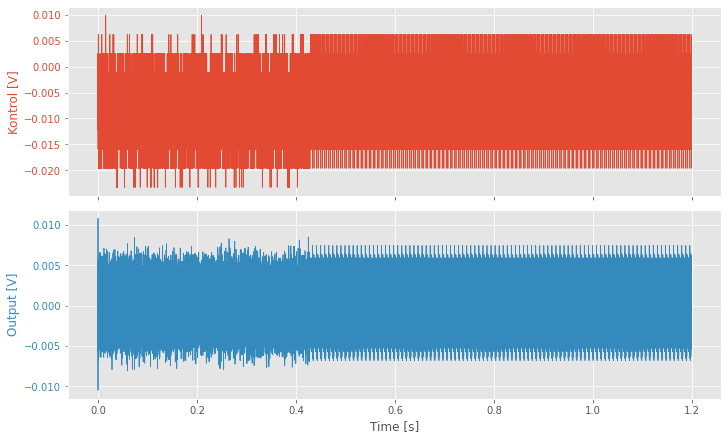

In [3]:
def plot_data(data_path: Path):
    out_dir = Path("plots", data_path.relative_to(Path("data")).with_suffix(".pdf"))
    data = np.loadtxt(data_path, delimiter=",")
    
    plt.close("all")
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

    cutoff = -1500
    sigin = data[:cutoff, 0]
    sigout = butter_bandpass_filter(data[:cutoff, 1], 20e3, 80e3, 1e6)
    t = np.arange(len(sigin)) / 1e6

    l1, = ax1.plot(t, sigin, c="C0", label="Kontrol signal")
    l2, = ax2.plot(t, sigout, c="C1", label="Measured signal")

    # lines = [l1, l2]
    # labels = [l.get_label() for l in lines]
    # ax2.legend(lines, labels)

    ax1.tick_params("y", color="C0", labelcolor="C0")
    ax2.tick_params("y", color="C1", labelcolor="C1")
    ax1.set_ylabel("Kontrol [V]", c="C0")
    ax2.set_ylabel("Output [V]", c="C1")

    # ax.set_ylim([-2, 14])
    # axr.set_ylim([-0.1, 0.1])

    # ax1.set_title("Half-Bridge Driver")
    # ax2.set_title("Full-Bridge Driver")
    ax2.set_xlabel("Time [s]")

    out_dir.parent.mkdir(exist_ok=True)
    fig.savefig(out_dir)
plot_data(Path("data/220413/data_VERO_124802.csv"))

## Plot all data

 87.50%  : data/220413/data_VERO_130733.csv

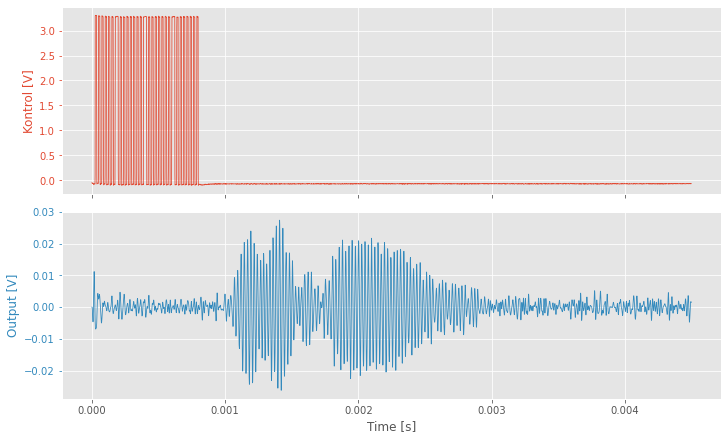

In [6]:
data_dir = Path("data/220413")
files = list(data_dir.glob("*.csv"))
for i, data_path in enumerate(files):
    print(f"\r\033[K{100*i/len(files):6.2f}%  : {data_path}", end="")
    plot_data(data_path)